# 1.Understanding Data
Read Data Network Flow Using Pandas

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import pandas as pd

df = pd.read_csv('/content/gdrive/My Drive/dataset/Fitur_Wavelet_1234_Cassava Leaf.csv')
df.head()

FileNotFoundError: ignored

In [ ]:
df.shape

(2704839, 50)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704839 entries, 0 to 2704838
Data columns (total 50 columns):
 #   Column                Dtype  
---  ------                -----  
 0   flow_key              object 
 1   src_ip_numeric        int64  
 2   src_ip                object 
 3   src_port              int64  
 4   dst_ip                object 
 5   dst_port              int64  
 6   proto                 int64  
 7   pktTotalCount         int64  
 8   octetTotalCount       int64  
 9   min_ps                int64  
 10  max_ps                int64  
 11  avg_ps                float64
 12  std_dev_ps            float64
 13  flowStart             float64
 14  flowEnd               float64
 15  flowDuration          float64
 16  min_piat              float64
 17  max_piat              float64
 18  avg_piat              float64
 19  std_dev_piat          float64
 20  f_pktTotalCount       int64  
 21  f_octetTotalCount     int64  
 22  f_min_ps              int64  
 23  f_max_p

In [ ]:
df['category'].value_counts()

Web                                  1416159
Network                               443446
Unspecified                           249071
SocialNetwork                         150941
Chat                                   75532
Download-FileTransfer-FileSharing      70830
Media                                  63901
Cloud                                  50465
VoIP                                   47010
Collaborative                          39037
System                                 36951
Email                                  22708
SoftwareUpdate                         16500
Video                                   7844
Music                                   3545
RemoteAccess                            3351
Game                                    2856
RPC                                     2205
Database                                 812
Streaming                                714
VPN                                      536
Shopping                                 237
Mining    

In [ ]:
df['web_service'].value_counts()

Google       569828
DNS          419915
TLS          259590
Unknown      249071
Microsoft    172392
              ...  
Zoom              1
BGP               1
MDNS              1
SOMEIP            1
GTP               1
Name: web_service, Length: 141, dtype: int64

# 2.Data Prepocessing

In [ ]:
#check null
df.isnull().sum()

flow_key                0
src_ip_numeric          0
src_ip                  0
src_port                0
dst_ip                  0
dst_port                0
proto                   0
pktTotalCount           0
octetTotalCount         0
min_ps                  0
max_ps                  0
avg_ps                  0
std_dev_ps              0
flowStart               0
flowEnd                 0
flowDuration            0
min_piat                0
max_piat                0
avg_piat                0
std_dev_piat            0
f_pktTotalCount         0
f_octetTotalCount       0
f_min_ps                0
f_max_ps                0
f_avg_ps                0
f_std_dev_ps            0
f_flowStart             0
f_flowEnd               0
f_flowDuration          0
f_min_piat              0
f_max_piat              0
f_avg_piat              0
f_std_dev_piat          0
b_pktTotalCount         0
b_octetTotalCount       0
b_min_ps                0
b_max_ps                0
b_avg_ps                0
b_std_dev_ps

In [ ]:
#check duplicate
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 10


In [ ]:
#remove duplicate
print('Number of rows before discarding duplicates = %d' % (df.shape[0]))
data2 = df.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % (data2.shape[0]))

Number of rows before discarding duplicates = 2704839
Number of rows after discarding duplicates = 2704829


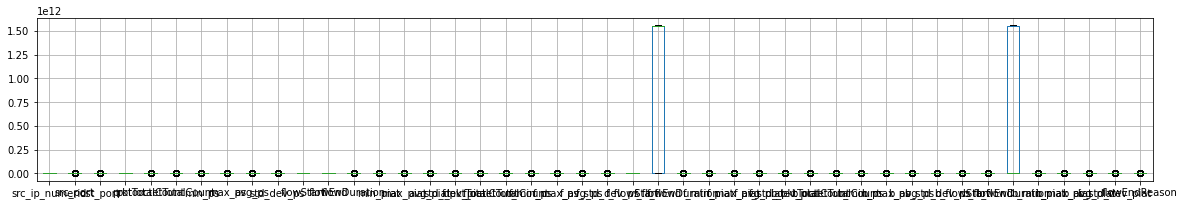

In [ ]:
#check Outliers
import matplotlib.pyplot as plt
data2.boxplot(figsize=(20,3))

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 484 kB/s 


In [ ]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['flow_key', 'src_ip', 'dst_ip', 'application_protocol', 'web_service','category'])

X_train = encoder.fit_transform(data2)

In [ ]:
X_train.head()

,flow_key,src_ip_numeric,src_ip,src_port,dst_ip,dst_port,proto,pktTotalCount,octetTotalCount,min_ps,...,b_flowEnd,b_flowDuration,b_min_piat,b_max_piat,b_avg_piat,b_std_dev_piat,flowEndReason,category,application_protocol,web_service
0,1,3232266497,1,67,1,67,17,22,7620,328,...,1.555955e+09,1.554399e+12,0.010354,198.657965,51.689181,84.916348,2,1,1,1
1,2,3232266497,1,67,2,67,17,17,5670,328,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2,1,1,1
2,1,3232266497,1,67,1,67,17,43,15124,328,...,1.555965e+09,1.554409e+12,0.022332,340.268454,89.927588,124.270745,2,1,1,1
3,2,3232266497,1,67,2,67,17,30,10086,328,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2,1,1,1
4,3,3232266497,1,0,3,0,1,1,56,56,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2,1,1,2


array([[-1.69242385e+00, -1.58631259e+00, -1.53435990e+00, ...,
        -7.01920389e-01, -9.27163202e-01, -1.04771762e+00],
       [-1.69242237e+00, -1.58631259e+00, -1.53435990e+00, ...,
        -7.01920389e-01, -9.27163202e-01, -1.04771762e+00],
       [-1.69242385e+00, -1.58631259e+00, -1.53435990e+00, ...,
        -7.01920389e-01, -9.27163202e-01, -1.04771762e+00],
       ...,
       [-1.37072708e+00,  1.26859937e+00,  7.38353266e-01, ...,
         3.76387913e-01, -9.27163202e-01, -4.19544734e-01],
       [ 1.75815885e+00,  1.26859937e+00,  7.38353266e-01, ...,
        -4.86258728e-01, -9.27163202e-01, -7.62809311e-04],
       [ 1.75816033e+00,  1.26859937e+00,  7.38353266e-01, ...,
        -4.86258728e-01, -9.27163202e-01, -7.62809311e-04]])

# 3.Data Exploration

In [ ]:
import matplotlib.pyplot as plt # plotting
import numpy as np
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()



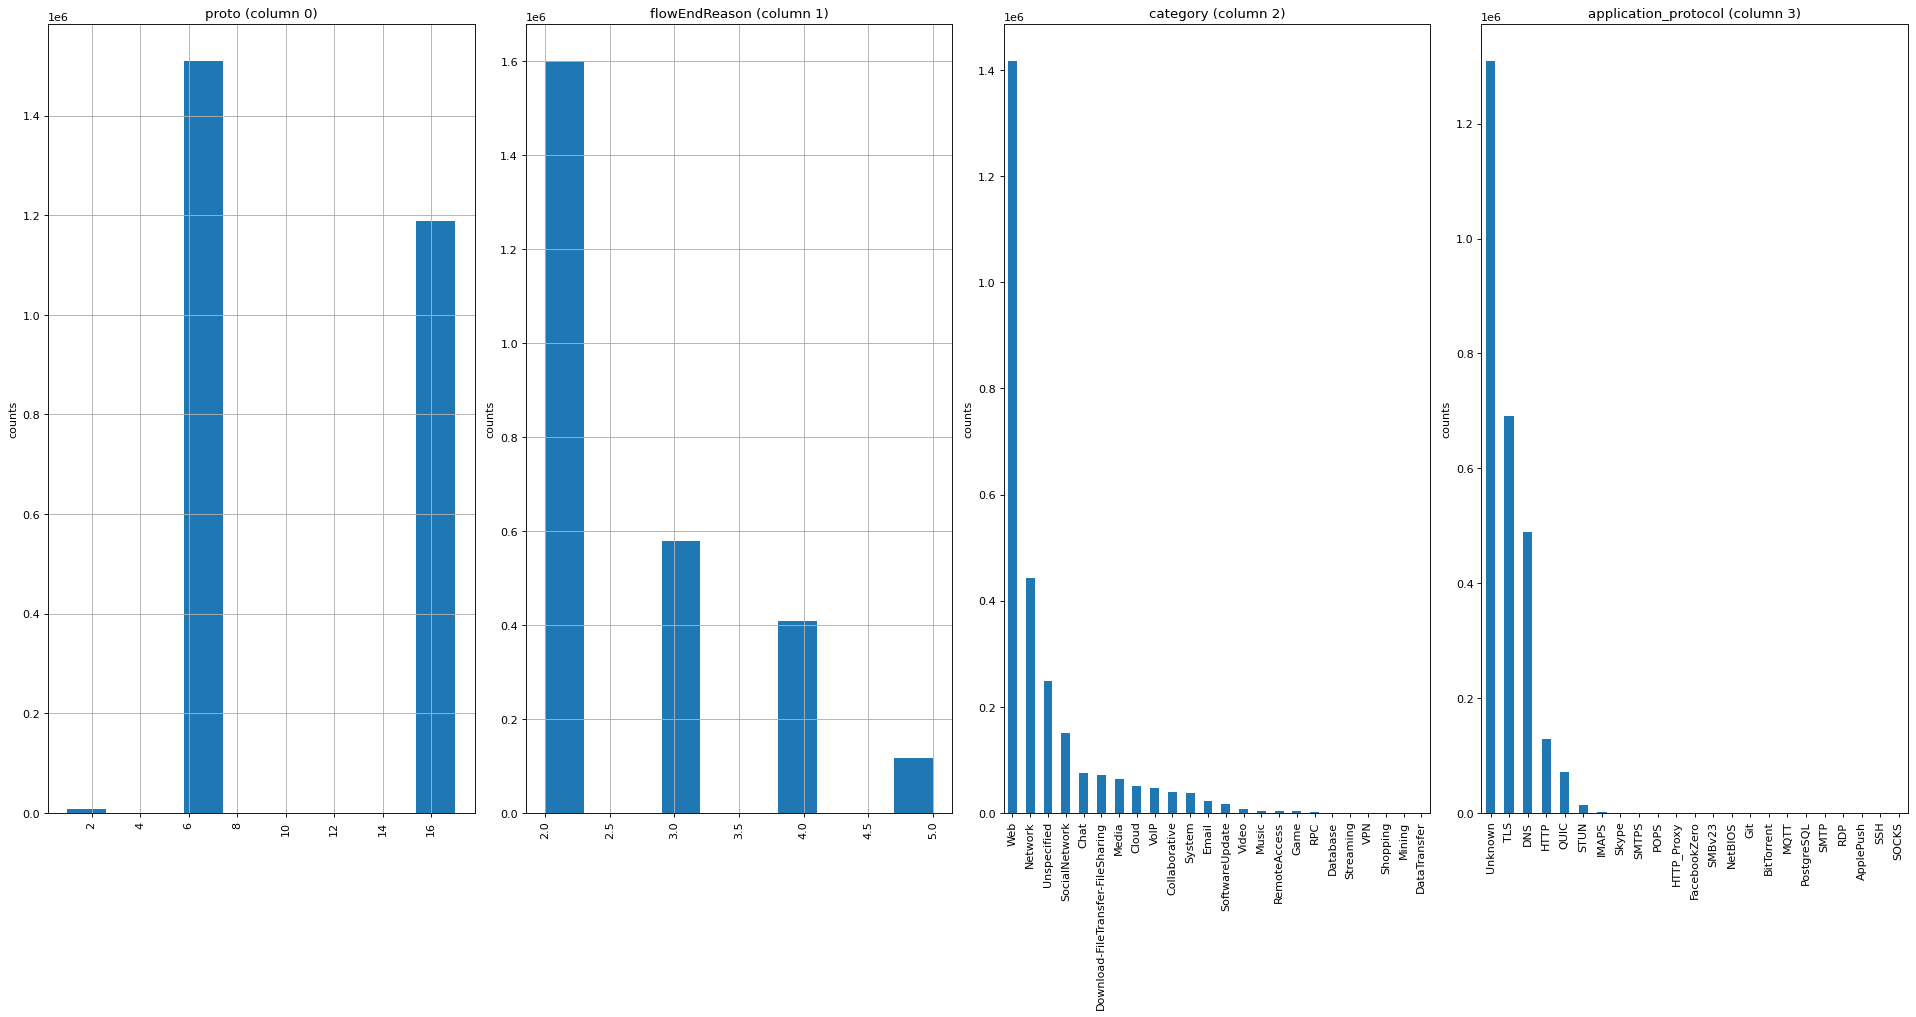

In [ ]:
plotPerColumnDistribution(data2, 10, 5)

In [ ]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [ ]:
plotScatterMatrix(data2, 20, 10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  after removing the cwd from sys.path.


In [ ]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


#  4.Classification KNN

In [ ]:
X = X_train.drop(['web_service'],axis=1)
Y = X_train['web_service']

In [ ]:
data = X_train[['dst_port','flowDuration','f_pktTotalCount','flowEndReason', 'web_service']]

In [ ]:
data.head()

,dst_port,flowDuration,f_pktTotalCount,flowEndReason,web_service
0,67,1701.385427,17,2,1
1,67,1701.385515,17,2,1
2,67,1450.967340,30,2,1
3,67,1450.967130,30,2,1
4,0,0.000000,1,2,2


In [ ]:
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()
data["web_service"] = lc.fit_transform(data["web_service"])
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,dst_port,flowDuration,f_pktTotalCount,flowEndReason,web_service
0,67,1701.385427,17,2,17
1,67,1701.385515,17,2,17
2,67,1450.967340,30,2,17
3,67,1450.967130,30,2,17
4,0,0.000000,1,2,43


In [ ]:
X = data.drop("web_service", axis=1)
y = data["web_service"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
# store the predicted response values
y_pred = neigh.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
# try K=1 through K=25 and record testing accuracy
k_range = range(1, 10)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

In [ ]:
X = df.drop(['web_service'],axis=1)
Y = df['web_service']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 50)

In [ ]:
X_train.shape, X_test.shape

((1812242, 49), (892597, 49))

In [ ]:
X_train.dtypes

flow_key                 object
src_ip_numeric            int64
src_ip                   object
src_port                  int64
dst_ip                   object
dst_port                  int64
proto                     int64
pktTotalCount             int64
octetTotalCount           int64
min_ps                    int64
max_ps                    int64
avg_ps                  float64
std_dev_ps              float64
flowStart               float64
flowEnd                 float64
flowDuration            float64
min_piat                float64
max_piat                float64
avg_piat                float64
std_dev_piat            float64
f_pktTotalCount           int64
f_octetTotalCount         int64
f_min_ps                  int64
f_max_ps                  int64
f_avg_ps                float64
f_std_dev_ps            float64
f_flowStart             float64
f_flowEnd               float64
f_flowDuration          float64
f_min_piat              float64
f_max_piat              float64
f_avg_pi

In [ ]:
X_train.head()

,flow_key,src_ip_numeric,src_ip,src_port,dst_ip,dst_port,proto,pktTotalCount,octetTotalCount,min_ps,...,b_flowStart,b_flowEnd,b_flowDuration,b_min_piat,b_max_piat,b_avg_piat,b_std_dev_piat,flowEndReason,application_protocol,web_service
1855976,3369c74afe21c17928b5d43a281d154c,3232268330,192.168.128.42,56477,172.16.255.200,53,17,2,215,66,...,1.556639e+09,1.556639e+09,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,2,Unknown,DNS
1665637,ec9df813ebf51a04de6b6968b13ba11a,3232266573,192.168.121.77,58664,77.234.42.252,443,6,19,6735,40,...,1.556639e+09,1.556639e+09,1.555082e+12,9.536743e-07,0.114066,0.027554,0.038676,2,Unknown,TLS
2410347,6ecfcffad6bc74e8084009a5b3aa40af,3232268375,192.168.128.87,56876,190.200.139.104,37431,6,9,452,40,...,1.559685e+09,1.559685e+09,1.558125e+12,2.040148e-03,0.549863,0.257491,0.225166,3,Unknown,BitTorrent
1560157,99831933d1cbf30574d43e8dcbf85a04,3232268349,192.168.128.61,60810,201.198.181.14,6882,6,2,104,52,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,2,Unknown,Unknown
82866,db584a45433d36b7f00cad3fc67d356c,3232266826,192.168.122.74,47102,157.240.14.10,443,6,1,52,52,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,2,TLS,Facebook


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 6.8 MB/s 


In [ ]:
import category_encoders as ce

In [ ]:
encoder = ce.OrdinalEncoder(cols=['flow_key', 'src_ip', 'dst_ip', 'application_protocol', 'web_service'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [ ]:
X_train.head()

,flow_key,src_ip_numeric,src_ip,src_port,dst_ip,dst_port,proto,pktTotalCount,octetTotalCount,min_ps,...,b_flowStart,b_flowEnd,b_flowDuration,b_min_piat,b_max_piat,b_avg_piat,b_std_dev_piat,flowEndReason,application_protocol,web_service
1855976,1,3232268330,1,56477,1,53,17,2,215,66,...,1.556639e+09,1.556639e+09,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,2,1,1
1665637,2,3232266573,2,58664,2,443,6,19,6735,40,...,1.556639e+09,1.556639e+09,1.555082e+12,9.536743e-07,0.114066,0.027554,0.038676,2,1,2
2410347,3,3232268375,3,56876,3,37431,6,9,452,40,...,1.559685e+09,1.559685e+09,1.558125e+12,2.040148e-03,0.549863,0.257491,0.225166,3,1,3
1560157,4,3232268349,4,60810,4,6882,6,2,104,52,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,2,1,4
82866,5,3232266826,5,47102,5,443,6,1,52,52,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,2,2,5


In [ ]:
X_test.head()

,flow_key,src_ip_numeric,src_ip,src_port,dst_ip,dst_port,proto,pktTotalCount,octetTotalCount,min_ps,...,b_flowStart,b_flowEnd,b_flowDuration,b_min_piat,b_max_piat,b_avg_piat,b_std_dev_piat,flowEndReason,application_protocol,web_service
2035266,-1.0,3232266846,91.0,54470,750.0,80,6,11,1300,40,...,1.559658e+09,1.559658e+09,1.558098e+12,0.001293,5.004293,2.109709,2.175080,3,1.0,11.0
2359343,630268.0,3232268330,1.0,51433,5857.0,443,6,3,151,40,...,1.559669e+09,1.559669e+09,0.000000e+00,0.000000,0.000000,0.000000,0.000000,4,1.0,2.0
1633209,-1.0,3232268421,204.0,21674,1.0,53,17,2,169,62,...,1.556290e+09,1.556290e+09,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2,4.0,17.0
507077,98594.0,3232268045,22.0,60880,7.0,443,6,13,3366,52,...,1.556035e+09,1.556035e+09,1.554479e+12,0.000065,0.101599,0.028283,0.037508,3,2.0,22.0
1966250,265063.0,3232266608,87.0,0,1.0,0,1,15,2646,111,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2,1.0,55.0


# 5.Classification Desicion Tree

In [ ]:
clf_gini = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [ ]:
y_pred_gini = clf_gini.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.4226


[Text(0.5, 0.875, 'X[0] <= 443.5\nentropy = 4.098\nsamples = 1812242\nvalue = [4, 29, 58770, 3429, 5633, 3371, 184, 2081, 473, 1\n357, 47241, 23, 16, 289, 15, 11398, 1335, 4, 281352\n44, 3411, 16, 7, 12853, 5, 31, 80704, 13797, 1\n4578, 381539, 3511, 5122, 4406, 237, 255, 58576, 4\n102295, 22839, 7, 5, 5019, 769, 15444, 45, 8, 10478\n3266, 1849, 3, 299, 9697, 2216, 30358, 115597, 124\n409, 6, 4170, 2, 16069, 1407, 16416, 280, 35, 7\n128, 1, 133, 117, 3316, 169, 1, 672, 240, 1351, 14\n12, 3, 1184, 140, 2, 149, 9, 406, 545, 9262, 3\n1, 22, 208, 2890, 3095, 2, 10677, 216, 960, 54, 78\n2268, 462, 544, 401, 173721, 123, 634, 547, 784, 372\n11, 6, 309, 7129, 6, 1, 10423, 263, 167356, 27, 4\n14, 67, 9, 15787, 673, 4, 2, 1134, 7479, 736, 3030\n37437, 1, 161, 1, 35]'),
 Text(0.25, 0.625, 'X[0] <= 105.5\nentropy = 3.767\nsamples = 1470154\nvalue = [0, 0, 56095, 3355, 5436, 2783, 183, 2079, 467, 0\n0, 167, 22, 0, 283, 0, 11317, 1335, 0, 281349, 42\n3411, 16, 7, 12484, 5, 26, 79830, 12045, 0, 4556

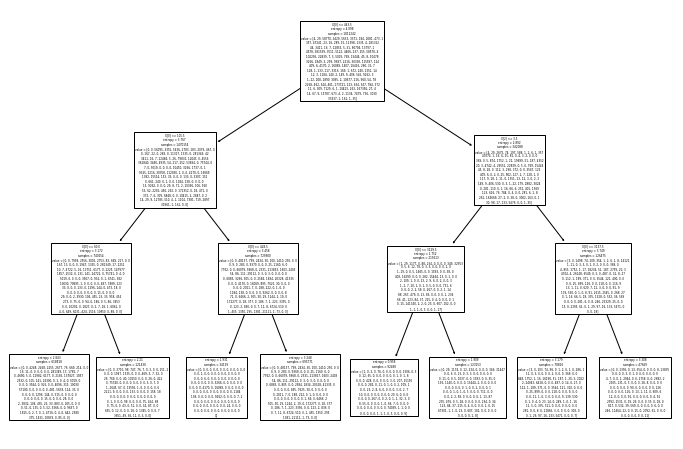

In [ ]:
import matplotlib.pyplot as plt # data visualization
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))